In [1]:
# %load_ext Cython
# !python3 setup.py build_ext --inplace
# !rm -rf 'fABBA'
# !rm -rf 'samples'
# !unzip fABBA.zip
!pip3 uninstall fABBA -'y'
# !pip3 install fABBA
# !git clone https://github.com/nla-group/fABBA.git
# !tar chvfz fABBA.tar.gz *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fABBA import fabba_model
from fABBA import ABBAbase

/home/research/xinyechen/Paper work/NEW ABBA/fABBA/fABBA/symbolic_representation.py:55: UserWarning: cython fail.
  warnings.warn("cython fail.")


fABBA({'_alpha': 0.1, '_sorting': 'norm', '_tol': 0.1, '_scl': 1, '_verbose': 0, '_max_len': inf, '_return_list': False, '_n_jobs': 1})
BbAaAaAaAaAaAaAaC


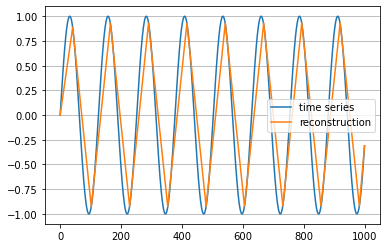

In [3]:
np.random.seed(1)
N = 100
ts = [np.sin(0.05*i) for i in range(1000)]          # original time series
fabba = fabba_model(tol=0.1, alpha=0.1, sorting='norm', scl=1, verbose=0)
print(fabba)
string = fabba.fit_transform(ts)
print(string)
inverse_ts = fabba.inverse_transform(string, ts[0])
# print(inverse_ts)
plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.savefig('demo.png', bbox_inches='tight')
plt.show()

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, init='k-means++')
abba = ABBAbase(tol=0.1, scl=1, clustering=kmeans, verbose=0)
string = abba.fit_transform(ts)
print(string)

BbAaAaAaAaAaAaAaC


[[41, 0.8873623686333753, 3.6230034118116965], [61, -1.8131770509611074, 5.8943962439956685], [63, 1.8484188925670724, 5.872864239427155], [63, -1.8419327359040158, 6.0541762129885885], [62, 1.8542235811893586, 5.302255051945844], [63, -1.8667731343214715, 5.356342011408055], [63, 1.8606733128740292, 5.528568456372762], [63, -1.854441973348166, 5.703926225703665], [63, 1.8480795561940113, 5.882365740983745], [63, -1.8415865111266632, 6.063836552502611], [62, 1.8538910433278817, 5.311033760679765], [63, -1.86645423697901, 5.365359936911309], [63, 1.8603474578416228, 5.5377530052286215], [63, -1.8541091836582453, 5.7132748011899315], [63, 1.8477398553691717, 5.891875700003592], [63, -1.8412399231779957, 6.073505206331632], [17, 0.6087035275438032, 0.03263000855400218]]


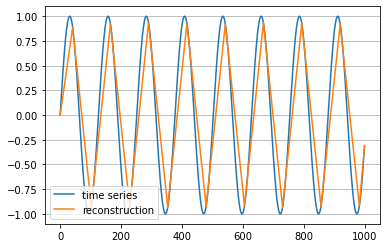

In [5]:
from fABBA import compress
from fABBA import inverse_compress

pieces = compress(ts, 0.1)
print(pieces)
inverse_ts = inverse_compress(pieces, ts[0])

plt.plot(ts, label='time series')
plt.plot(inverse_ts, label='reconstruction')
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [6]:
from fABBA.aggregation_memview import aggregate
string, parameters = aggregate(np.array(pieces)[:,:2], "pca", 0.1)


In [7]:
import numpy as np
from fABBA.symbolic_representation import fabba_model
np.random.seed(1)
N = 100
ts = [np.sin(0.05*i) for i in range(1000)]          # original time series
fabba = fabba_model(tol=0.1, alpha=0.1, sorting='2-norm', scl=1, verbose=1, max_len=np.inf)
print(fabba)

string = fabba.fit_transform(ts)
print(string)

inverse_ts = fabba.inverse_transform(string, ts[0]) # reconstructed time series

2022-01-24 20:17:27,049;INFO;Digitization: Reduced pieces of length 17 to 5  symbols


fABBA({'_alpha': 0.1, '_sorting': '2-norm', '_tol': 0.1, '_scl': 1, '_verbose': 1, '_max_len': inf, '_return_list': False, '_n_jobs': 1})
BbAaAaAaAaAaAaAaC


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from fABBA.load_datasets import load_images
from fABBA.symbolic_representation import image_compress
from fABBA.symbolic_representation import image_decompress
from fABBA.symbolic_representation import fabba_model
from cv2 import resize

img_samples = load_images() # load fABBA image test samples
img = resize(img_samples[0], (100, 100)) # select the first image for test
fabba = fabba_model(tol=0.1, alpha=0.01, sorting='2-norm', scl=1, verbose=1, max_len=np.inf)
strings = image_compress(fabba, img)
inverse_img = image_decompress(fabba, strings)

2022-01-24 20:17:27,654;INFO;Digitization: Reduced pieces of length 15534 to 975  symbols


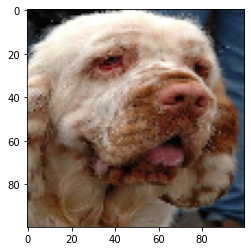

In [9]:
plt.imshow(img)
plt.savefig('img.png', bbox_inches='tight')
plt.show()

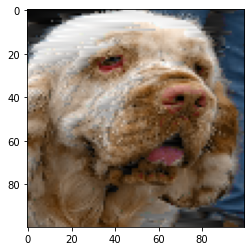

In [10]:
plt.imshow(inverse_img)
plt.savefig('inverse_img.png', bbox_inches='tight')
plt.show()